In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import elementary_charge

In [2]:
V_AC = 1.8 # KV

In [3]:
def MON2STP(V):
    return 82 * (V - 0.06)

def DC2E(V):
    return 4850 * (V - 0.06)

In [4]:
# HV_DC = np.array([0.53548, 0.73306, 0.88473, 0.95816, 0.67566, 0.73789, 0.80623, 0.61900, 0.43532, 0.38120, 0.46225, 0.45127, 0.56236, 0.62444, 0.39434, 1.02599, 0.95965, 0.87343, 0.78417, 0.69996])

# V_STP = MON2STP(HV_DC)
# V_STP

In [5]:
V0 = 0.42228 
HV_DC = np.array([0.53788, 0.57150, 0.64216, 0.69541, 0.79026, 0.26055, 0.17989, 0.26904, 0.67921])

E = DC2E(HV_DC)
E

array([2317.718 , 2480.775 , 2823.476 , 3081.7385, 3541.761 ,  972.6675,
        581.4665, 1013.844 , 3003.1685])

In [6]:
z1 = np.array([1796, 1788, 1756, 1740, 1704, 1904, 1920, 1896, 1736])
z2 = np.array([1548, 1464, 1272, 1132, 876, 2240, 2248, 2224, 1176])

z0 = 1844

z_eq = (z1 + z2) / 2 
z_max = z1 - z_eq
z_eq -= z0

px2m = 1.25e-3 / 2094 
z_eq *= px2m
z_max *= px2m

In [34]:
ind = np.argsort(E)[1:] #remove one point that looked off 

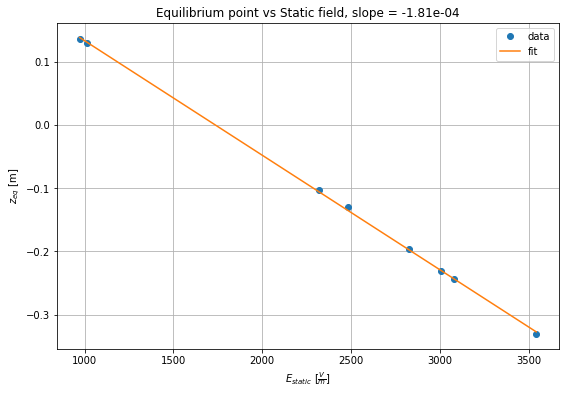

In [8]:

pol_eq, err_eq = np.polyfit(E[ind], z_eq[ind], deg=1, cov=True)
fit = np.polyval(pol_eq, E[ind])
plt.figure('z_eq', figsize=(9, 6))
plt.title(f'Equilibrium point vs Static field, slope = {pol_eq[0]*1e3:.2e}')
plt.plot(E[ind], z_eq[ind]*1e3, "o", label='data')
plt.plot(E[ind], fit*1e3, label='fit')
plt.grid()
plt.legend()
plt.xlabel('$E_{static}$ [$\\frac{V}{m}$]')
plt.ylabel('$z_{eq}$ [mm]')
plt.show()

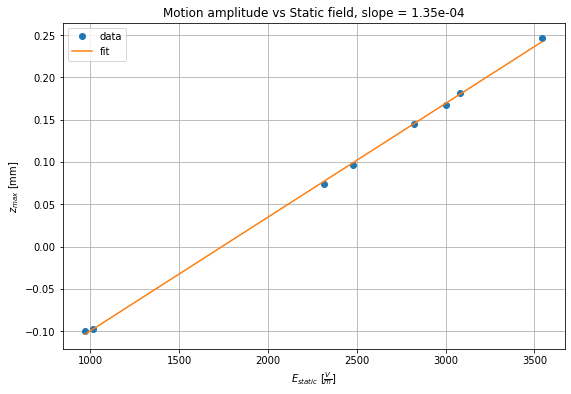

In [9]:
pol_m, err_max= np.polyfit(E[ind], z_max[ind], deg=1, cov=True)
fit = np.polyval(pol_m, E[ind])
plt.figure('z_m', figsize=(9, 6))
plt.title(f'Motion amplitude vs Static field, slope = {pol_m[0]*10**3:.2e}')
plt.plot(E[ind], z_max[ind]*10**3, "o", label='data')
plt.plot(E[ind], fit*10**3, label='fit')
plt.grid()
plt.legend()
plt.xlabel('$E_{static}$ [$\\frac{V}{m}$]')
plt.ylabel('$z_{max}$ [mm]')
plt.show()
# plt.plot(E[ind], z_max[ind], "o")
# plt.plot(E[ind], fit)

In [10]:
slope_eq, offset_eq = pol_eq
slope_max, offset_max = pol_m

print(slope_eq, offset_eq, slope_max, offset_max)

qm = slope_max**2 / slope_eq * (50/2/np.pi)**2 / 2
m = elementary_charge / qm
m

-1.810403932140788e-07 0.0003139635594347953 1.3453123532828015e-07 -0.0002343721966369421


-5.061617715284159e-14

In [11]:
r = 30 * px2m
v = 4 / 3 * np.pi * r**3
rho = 510 # kg/m3
m = rho*v
nq = qm * m / elementary_charge
print(f"Mass {m:.3e}[kg], with about {nq:.3f} electrons")
print('well done')

Mass 1.227e-11[kg], with about -242.400 electrons
well done


calculate the error from the slope err

In [20]:
abs(err_max[0][0]*slope_max / slope_eq * (50/2/np.pi)**2 / 2) + abs(err_eq[0][0]*slope_max**2 / (slope_eq**2) * (50/2/np.pi)**2 / 2)

6.509151411534864e-17

In [33]:
qm*0.22*10**-11

-6.963759005656393e-18

In [32]:
qm /m * (0.22*10**-11)

-5.675722800171473e-07

In [27]:
v*40 + px2m*rho*4*np.pi*r**2

2.1892420071014163e-12